# Trabalho Prático

## Autoria

1. **Nome:** Gabrielly Barcelos Cariman

2. **Matrícula:** 2022101409

3. **E-mail institucional:** gabrielly.cariman@edu.ufes.br

3. **Curso:** Engenharia de Computação

## Conjunto de Dados

Para esse trabalho será utilizado um conjunto de dados musical. Será considerada apenas uma amostra do conjunto original, que pode ser encontrado em https://www.kaggle.com/datasets/nikhilnayak123/5-million-song-lyrics-dataset. O conjunto completo é composto por aproximadamente 5 milhões de letras de músicas coletadas da plataforma musical Genius (https://genius.com/).

O dataset reduzido se encontra em:

* Link 1: https://drive.google.com/file/d/1zFhB0vaQTtPm31x0lxcR6U_teZxtJ083/view?usp=sharing
* Link 2: https://zenodo.org/record/8399410/files/trab_01_DS2023.zip

O conjunto de dados contém apenas um arquivo (`.csv`) com as seguintes colunas:

* **title**: Título da música (`str`);
* **tag**: Gênero musical (`str`);
* **artist**: Artista (`str`);
* **year**: Ano de lançamento da música (`int`);
* **views**: Visualizações no site (`int`);
* **features**: Informações extras, e.g. colaborações com outros artistas (`str`).
* **lyrics**: Letra da música (`str`).

Os comandos abaixo mostram como os dados são obtidos e carregados em um `DataFrame`.

In [ ]:
!wget https://zenodo.org/record/8399410/files/trab_01_DS2023.zip

--2023-11-01 04:24:18--  https://zenodo.org/record/8399410/files/trab_01_DS2023.zip
Resolving zenodo.org (zenodo.org)... 188.185.33.206, 188.185.10.78, 188.185.22.33, ...
Connecting to zenodo.org (zenodo.org)|188.185.33.206|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/8399410/files/trab_01_DS2023.zip [following]
--2023-11-01 04:24:19--  https://zenodo.org/records/8399410/files/trab_01_DS2023.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 442671247 (422M) [application/octet-stream]
Saving to: ‘trab_01_DS2023.zip’

trab_01_DS2023.zip  100%[===================>] 422.16M  16.0MB/s    in 28s     

2023-11-01 04:24:48 (14.8 MB/s) - ‘trab_01_DS2023.zip’ saved [442671247/442671247]



In [ ]:
!unzip trab_01_DS2023.zip

Archive:  trab_01_DS2023.zip
  inflating: trab_01_DS2023.csv      


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer

import string

!pip install unidecode
import unidecode

from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt

!pip install langdetect
from langdetect import detect

from sklearn.cluster import KMeans

import gc

import os

from sklearn.preprocessing import StandardScaler

import numpy as np

import sklearn.metrics as metrics
from sklearn.metrics.cluster import fowlkes_mallows_score

from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csgraph
from numpy import linalg as LA

from sklearn.cluster import SpectralClustering


languages = {
  "ar": "arabic",
  "az": "azerbaijani",
  "eu": "basque",
  "bn": "bengali",
  "ca": "catalan",
  "zh": "chinese",
  "da": "danish",
  "de": "german",
  "el": "greek",
  "en": "english",
  "es": "spanish",
  "fi": "finnish",
  "fr": "french",
  "he": "hebrew",
  "hu": "hungarian",
  "id": "indonesian",
  "it": "italian",
  "kk": "kazakh",
  "ne": "nepali",
  "nl": "dutch",
  "no": "norwegian",
  "pt": "portuguese",
  "ro": "romanian",
  "ru": "russian",
  "sl": "slovene",
  "sv": "swedish",
  "tg": "tajik",
  "tr": "turkish",
}


languages_size = {
  "arabic": 1,
  "azerbaijani": 1,
  "basque": 1,
  "bengali": 1,
  "catalan": 1,
  "chinese": 1,
  "danish": 1,
  "german": 0.20,
  "greek": 1,
  "english": 0.016,
  "spanish": 0.24,
  "finnish": 1,
  "french": 0.14,
  "hebrew": 1,
  "hungarian": 1,
  "indonesian": 0.68,
  "italian": 0.33,
  "kazakh": 1,
  "nepali": 1,
  "dutch": 1,
  "norwegian": 1,
  "portuguese": 0.64,
  "romanian": 1,
  "russian": 1,
  "slovene": 0.44,
  "swedish": 1,
  "tajik": 1,
  "turkish": 0.58
}

[nltk_data] Downloading package punkt to
[nltk_data]     /home/gabriellybc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gabriellybc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


## Leitura da Base Inteira

In [ ]:
dtype_dict = {
    "title": "str",
    "tag": "category",
    "artist": "category",
    "year": "uint16",
    "views": "uint32"
    }

df = pd.read_csv("trab_01_DS2023.csv", dtype=dtype_dict)
df.drop(columns="Unnamed: 0", inplace=True)

In [ ]:
df.head()

,title,tag,artist,year,views,features,lyrics
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki..."
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,..."
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548906 entries, 0 to 548905
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   title     548906 non-null  object  
 1   tag       548906 non-null  category
 2   artist    548906 non-null  category
 3   year      548906 non-null  uint16  
 4   views     548906 non-null  uint32  
 5   features  548906 non-null  object  
 6   lyrics    548906 non-null  object  
dtypes: category(2), object(3), uint16(1), uint32(1)
memory usage: 21.0+ MB


In [ ]:
tamanho_original = df.shape[0]
tamanho_original

548906

A base de dados original contém 548.906 linhas. O objetivo é verificar se existe uma relação entre a letra das músicas e os gêneros musicais. Portanto, todas as colunas que não se referem a essas duas informações foram eliminadas para ocupar menos espaço na memória.

In [ ]:
df.drop(columns=['title', 'artist', 'year', 'views', 'features'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548906 entries, 0 to 548905
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   tag     548906 non-null  category
 1   lyrics  548906 non-null  object  
dtypes: category(1), object(1)
memory usage: 4.7+ MB


## Objetivo

Será utilizar aprendizado não supervisionado (neste caso, agrupamento) para investigar se há relação entre a **letra** de uma música e o **gênero musical** a que pertence.

De forma mais específica, serão agrupadas as músicas de acordo suas letras e, após isso, verificada a distribuição dos gêneros em cada grupo. Ou seja, se as músicas pertencentes ao mesmo grupo possuem o mesmo gênero ou se as distribuições de gêneros de grupos diferentes são distintas.

## Metodologia

Para atingir o objetivo proposto, os seguintes passos serão seguidos:
1. Pré-processamento dos dados textuais;
2. Construção da matriz de TF-IDF;
3. Redução de dimensionalidade;
4. Aplicação de ao menos dois algoritmos de agrupamento vistos na disciplina;
5. Validação da metodologia utilizada;
6. Interpretação dos resultados.

### 1. Limpeza e pré-processamento dos dados textuais


Os seguintes pontos serão seguidos:

- Dividir o texto em *tokens*
- Converter o texto para letras minúsculas
- Remover símbolos de pontuação de cada *token*
- Converter caracteres especiais (passo discutível e necessidade deve ser analisada)
- Remover *tokens* que não são palavras
- Remover *tokens* que são *stop words*
- *stemming*

Além disso, foi utilizada a biblioteca `langdetect` para identificar a língua do texto e salvar essa informação em uma nova coluna do *data frame*. Outro tratamento feito foi selecionar apenas as palavras que contenham mais de 3 letras distintas. Essa decisão foi tomada porque muitas *stopwords* têm apenas 3 letras e o objetivo é remover essas palavras, que acabam não tendo um significado muito grande.

Quando a língua não foi identificada ou para línguas que não estão previamente definidas na própria biblioteca das *stopwords* foram classificadas como "unknown" e posteriormente removidas da base. Também foram removidas as linhas em que a coluna de letra de música estava vazia.

In [ ]:
def detect_language(phrase):
    try:
        return languages[detect(phrase)]
    except:
        return "unknown"


def preprocessing(row):
  print(f"Acessando linha {row.name + 1}")

  # A ultima posção do vetor foi selecionada por conter a letra na lingua mais conhecida
  lyric = row.lyrics[-1] if len(row.lyrics[-1]) > 1 else row.lyrics

  # Dividindo o texto em palavras
  tokens = word_tokenize(lyric)

  # "Convertendo" caracteres especiais
  # Convertendo o texto para letras minúsculas
  # Removendo símbolos de pontuação de cada *token*
  table = str.maketrans('', '', string.punctuation)

  tokens = [unidecode.unidecode(word).lower().translate(table) for word in tokens]

  phrase = " ".join(tokens)

  language = detect_language(phrase)

  if (language != "unknown"):
    # Removendo *tokens* que não são palavras
    # Removendo *stop words*
    stop_words = set(stopwords.words(language))
    # *Stemming*
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens  if ((word.isalpha()) and (len(set(word)) > 3) and (not word in stop_words))]

    phrase = " ".join(tokens)

  return phrase, language


df[["lyrics", "language"]] = df.apply(preprocessing, axis=1, result_type='expand')
df = df[df["language"] != "unknown"]
df["language"] = df["language"].astype("category")
df.dropna(subset=["lyrics"], inplace=True)

In [ ]:
df.head()

,tag,lyrics,language
0,rap,choru opera steve camron killa killa killa kil...,english
1,rap,produc gotti intro yeah yeah rocafella invit s...,english
2,rap,mayb caus eatin bastard fiend grub carri pump ...,english
3,rap,produc kany west brian miller intro camron kan...,english
4,rap,intro young second time around come back tri t...,english


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508732 entries, 0 to 548904
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   tag       508732 non-null  category
 1   lyrics    508732 non-null  object  
 2   language  508732 non-null  category
dtypes: category(2), object(1)
memory usage: 8.7+ MB


A base completa precisaria de uma capacidade computacional muito maior do que a que eu tenho para fornecer agora. Além disso, o fato de ter múltiplas línguas para analisar torna muito mais complexo agrupar as diferentes palavras existentes.

Por isso, foram separadas e agrupadas as diferentes variações de línguas existentes. Dessa forma, foi possível obter um dataframe apenas com uma única língua, e este dataframe foi baixado em formato CSV.

No entanto, mesmo dividindo o dataframe original em diferentes línguas, algumas tinham tantos dados que antes de salvá-las em CSV foi preciso utilizar a função `sample` para selecionar algumas amostras de forma aleatória do dataframe original.

O tamanho dessas amostras está salvo na variável `languages_size` e foi definido como uma porcentagem do dataframe original. Dataframes maiores ficaram com porcentagens menores para que o tamanho máximo de capacidade fosse respeitado por todas as línguas.

In [ ]:
tamanho_novo = 0

language_groups = df.groupby("language")
for language, language_data in language_groups:

    print(language)
    sample_size = languages_size[language]

    if sample_size != 1:
      language_data = language_data.sample(n=int(sample_size*language_data.shape[0]), random_state=42)

    tamanho_novo += language_data.shape[0]
    language_data.to_csv(f"{language}.csv", index=False)

In [ ]:
tamanho_final = tamanho_novo/tamanho_original
tamanho_final

0.11128317052464357

In [ ]:
tamanho_final*100

11.128317052464357

Depois de todo esse processamento, todas as bases ficam com aproximadamente 11% do tamanho original.

### Processamento e análise de todas as bases

O processamento e a análise dos resultados foram realizados da seguinte forma para cada idioma:

Primeiramente, foi lido o arquivo CSV, também removendo as linhas nulas que existirem na coluna de letras de música.

Além disso, a informação dos gêneros musicais foi armazenada em um novo dataframe, no qual cada linha corresponde a um gênero. As linhas possuem o valor 0 para indicar que não é aquele gênero, e o valor 1 para indicar que de fato representa aquele gênero.

Em diversas partes do código, foi necessário apagar variáveis para evitar que a RAM ficasse cheia com todas as informações, permitindo assim o processamento de todos os idiomas.

#### 2. Construção da matriz de TF-IDF
Depois disso, foi feita a construção da matriz de TF-IDF. A matriz TF-IDF (Term Frequency-Inverse Document Frequency) é uma representação numérica de um conjunto de frases que considera a importância de cada palavra. Ela combina a frequência de uma palavra em um documento (TF) com a raridade dessa palavra em todos os documentos (IDF) para atribuir um peso a cada palavra.

Como o objetivo é verificar se os grupos de gêneros musicais também podem ser formados a partir das letras das músicas, o vetorizador foi configurado para considerar apenas os termos que ocorrem em menos de 50% dos documentos, com o intuito de excluir termos muito específicos, e em pelo menos 5 documentos, com o objetivo de selecionar termos que representem bem o grupo.

Além disso, após a construção da matriz de TF-IDF, também foram selecionadas apenas as colunas (palavras) que tinham um valor menor que 0,95, com o objetivo de remover palavras muito específicas, e maiores que 0,20, também para ter palavras que representem bem um grupo.

A todo momento, os dados foram escalados para lidar com valores discrepantes e garantir consistência nas análises.

#### 3. Redução de dimensionalidade
Foi necessária a redução da dimensionalidade da matriz com as palavras devido ao excesso de colunas, resultante da presença de diversas palavras em várias músicas. Como a clusterização utiliza distâncias, essas distâncias são afetadas pela alta dimensionalidade da matriz. Por essa razão, decidi limitar o número máximo de dimensões possíveis e foquei apenas nas 10 primeiras dimensões.

Além disso, é importante destacar que para a redução da dimensionalidade, não foi utilizado o PCA, mas sim o SVD. Embora o PCA utilize o SVD internamente, inicialmente optou-se pelo SVD para a redução de dimensionalidade, pois ele gera uma decomposição mais geral de uma matriz para diversos propósitos, não se limitando apenas à redução de dimensionalidade. No entanto, para este projeto, apenas a aplicação da decomposição foi necessária, sem a utilização dos outros propósitos do SVD.

Para selecionar o número correto de grupos reduzidos para a nova dimensão, foi plotada a curva dos valores singulares de x em relação à quantidade de dimensões.

A quantidade de dimensões escolhida para todas as línguas é o menor valor que apresenta a maior quantidade de valores singulares, localizado no "cotovelo" da curva.

#### 4. Aplicação de ao menos dois algoritmos de agrupamento vistos na disciplina
O K-means foi selecionado devido à sua simplicidade e eficiência computacional. O coeficiente de silhueta é uma métrica utilizada para avaliar a qualidade de agrupamentos. Depois de ter reduzido as dimensões a partir do número selecionado, foi feita a escolha do número de clusters que será utilizado no K-means. Para isso, foi plotada a curva de diferentes valores de coeficiente de silhueta para vários números de grupos. Dessa forma, foi escolhido o número de grupos que gerava um dos maiores valores de coeficiente de silhueta.

Porém, o objetivo é verificar se as letras das canções estão relacionadas com os diferentes gêneros de música. Embora existam diversos gêneros de músicas, não são tantos assim. Por isso, vou começar a análise a partir de 3 grupos. Mesmo que existam muitos gêneros, não serão considerados mais do que 10 grupos para a análise.

O Agrupamento Espectral também foi selecionado, porque ele é um método eficaz para agrupar dados com base em similaridades entre pontos. Lidando bem com clusters complexos, robusto a ruídos e outliers.

Após a redução da dimensionalidade, foi calculado também o número de grupos que seriam utilizados no Agrupamento Espectral. Isso foi feito usando a medida do eigengap para motivar a escolha de um número adequado de grupos para o agrupamento espectral. Foi plotado o valor do autovalor em relação ao seu índice.

Da mesma forma que foi feito na escolha do número de grupos para o K-means, também serão analisados apenas números de grupos que variem entre 3 e 10. O número de grupos escolhido é o índice do autovalor que apresenta a maior variação em relação ao próximo autovalor.

#### 5. Validação da metodologia utilizada
Após isso, foi feita a validação da metodologia usada comparando com os gêneros musicais que de fato são corretos. Para isso, o dataframe dos gêneros musicais foi colocado em escala.

Primeiro, foi aplicado o K-means aos dados gerais com o número de grupos selecionado a partir do gráfico. Em seguida, foi aplicado o K-means aos dados das respostas dos gêneros musicais, com o número de grupos sendo a quantidade de gêneros musicais existentes naquele idioma.

Posteriormente, os agrupamentos de resposta desses dois K-means - um das letras das músicas e o outro com as respostas dos gêneros musicais - foram comparados utilizando o Índice Fowlkes-Mallows.

Uma outra opção cotada foi o Rand Index, porém, apesar do Fowlkes-Mallows Index ser uma medida assimétrica por ignorar os verdadeiros negativos, ele será 1 quando não houver falso-negativo nem falso-positivos. Isso dá um peso maior para a precisão na classificação de pares de pontos, o que o Rand Index não faz ao avaliar tudo de uma forma mais geral.

Outra alternativa, ideal inclusive, seria plotar os pontos das respostas do K-means no plano de duas dimensões e comparar as duas respostas. No entanto, essa alternativa é inviável, pois estamos trabalhando com altas dimensões, e quando esses dados são trazidos para baixas dimensões, como 2 dimensões, muitas informações são perdidas. Com isso, o resultado no gráfico é apenas um aglomerado de pontos em uma única região circular do gráfico.

Para o agrupamento espectral, a mesma metodologia foi aplicada.


---------------------------------------------------------------------
Processando 1 de 28
Idioma: catalan



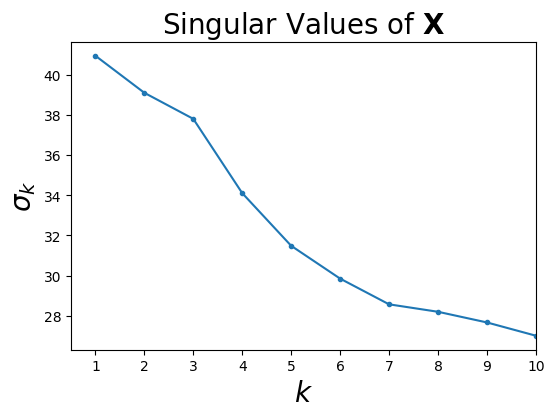

Numero de dimansão escolhido: 7



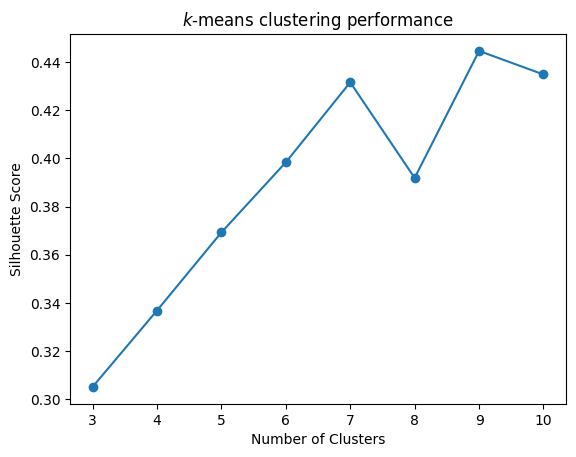

Número k selecionado: 7



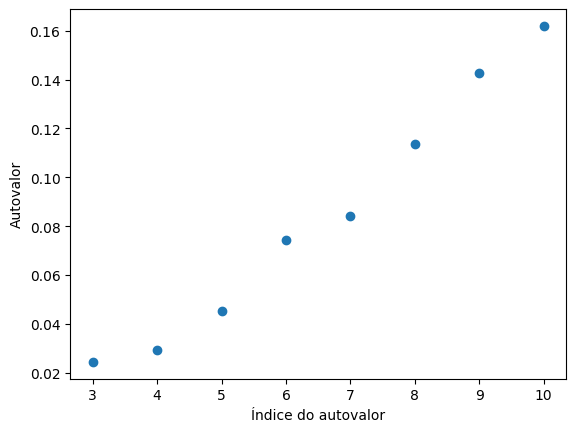

Número de grupos para o Agrupamento Espectral: 5


KMeans
Fowlkes Mallows Score: 0.3243

Agrupamento Espectral
Fowlkes Mallows Score: 0.3589

Quantidade de gêneros musicais: 6

---------------------------------------------------------------------
Processando 2 de 28
Idioma: danish



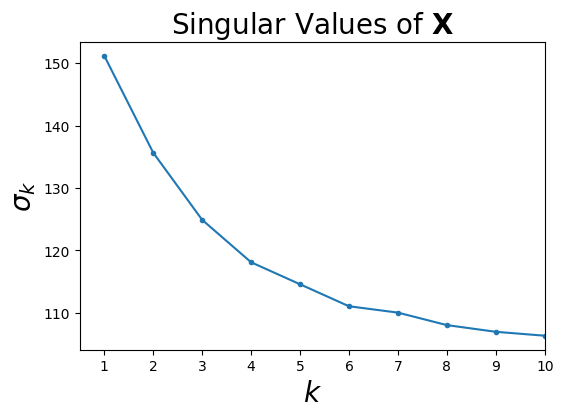

Numero de dimansão escolhido: 6



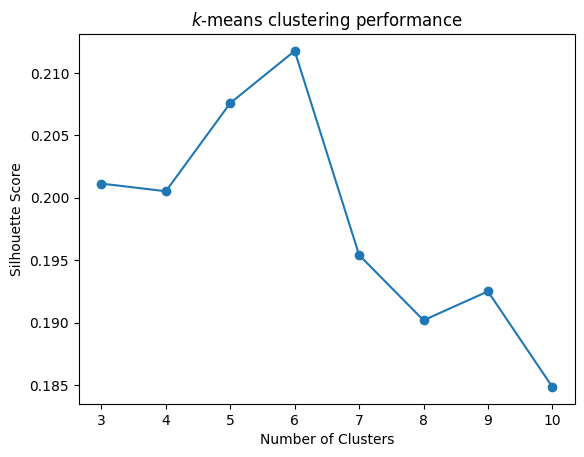

Número k selecionado: 6



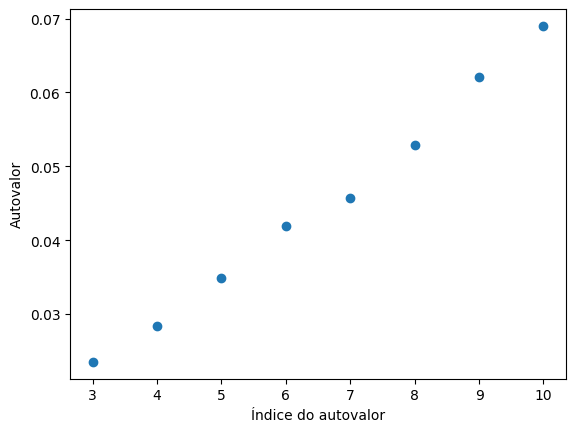

Número de grupos para o Agrupamento Espectral: 5


KMeans
Fowlkes Mallows Score: 0.3762

Agrupamento Espectral
Fowlkes Mallows Score: 0.3982

Quantidade de gêneros musicais: 5

---------------------------------------------------------------------
Processando 3 de 28
Idioma: german



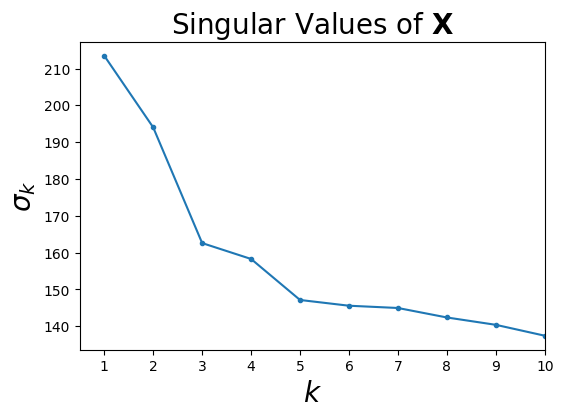

Numero de dimansão escolhido: 5



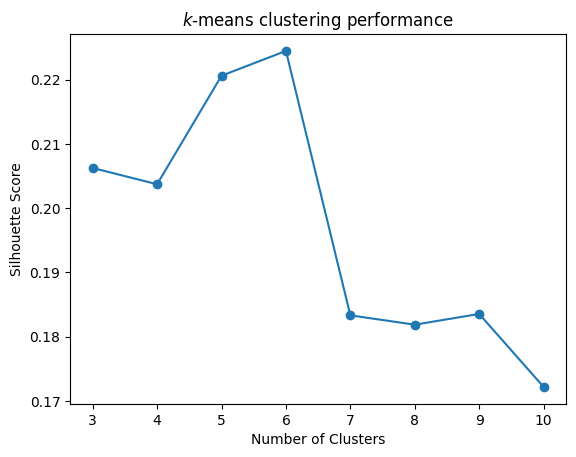

Número k selecionado: 6



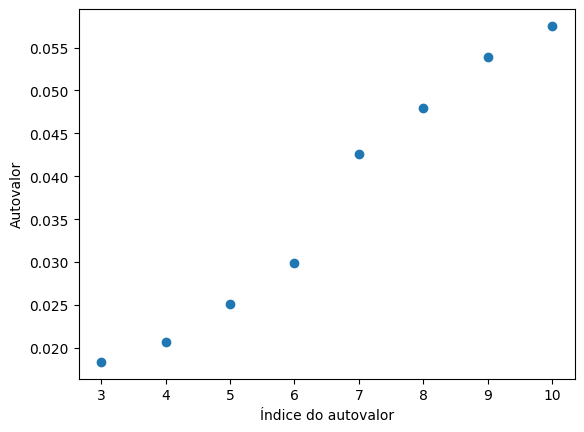

Número de grupos para o Agrupamento Espectral: 6


KMeans
Fowlkes Mallows Score: 0.3705

Agrupamento Espectral
Fowlkes Mallows Score: 0.3764

Quantidade de gêneros musicais: 6

---------------------------------------------------------------------
Processando 4 de 28
Idioma: english



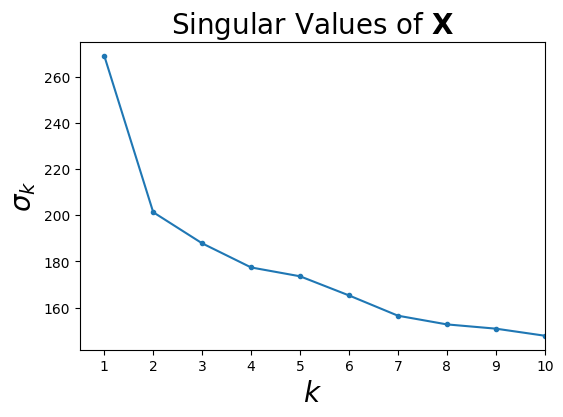

Numero de dimansão escolhido: 7



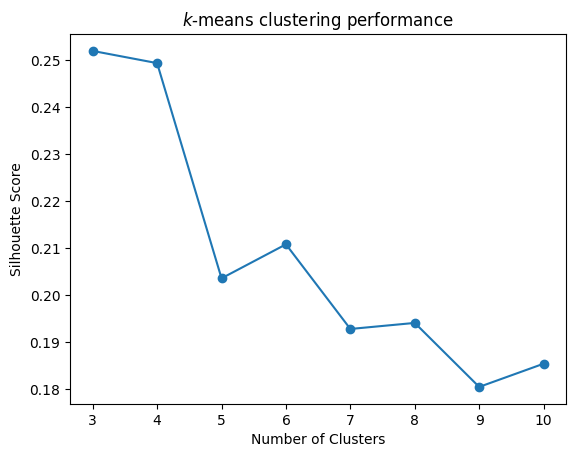

Número k selecionado: 4



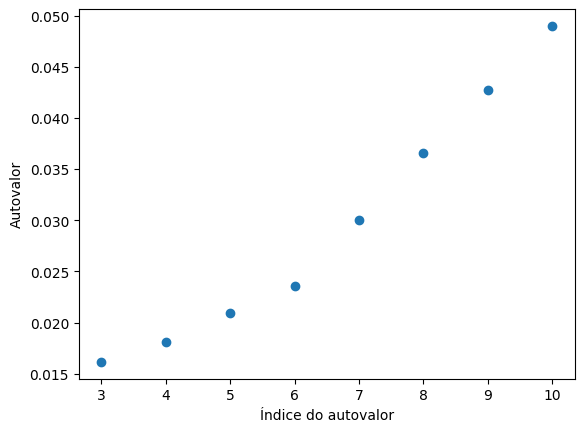

Número de grupos para o Agrupamento Espectral: 6


KMeans
Fowlkes Mallows Score: 0.4108

Agrupamento Espectral
Fowlkes Mallows Score: 0.4095

Quantidade de gêneros musicais: 6

---------------------------------------------------------------------
Processando 5 de 28
Idioma: spanish



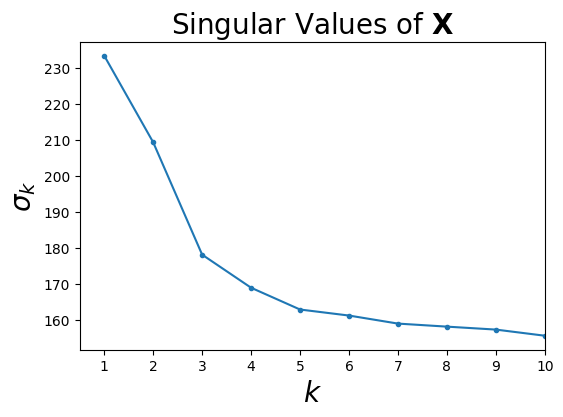

Numero de dimansão escolhido: 5



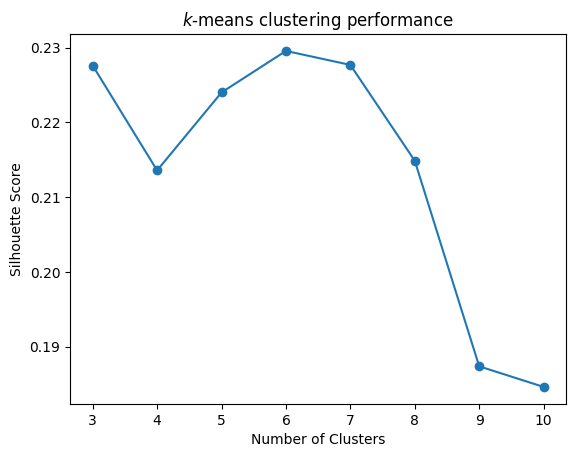

Número k selecionado: 6



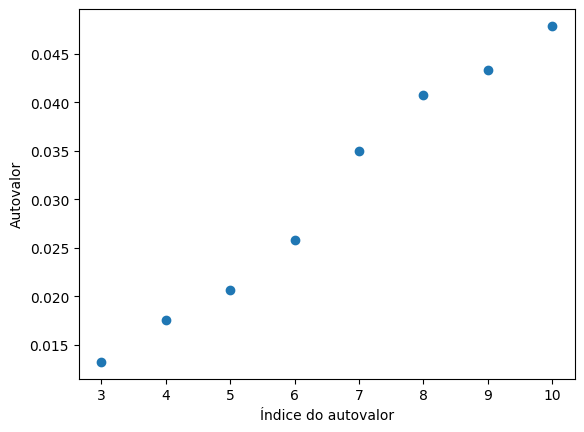

Número de grupos para o Agrupamento Espectral: 6


KMeans
Fowlkes Mallows Score: 0.3932

Agrupamento Espectral
Fowlkes Mallows Score: 0.3941

Quantidade de gêneros musicais: 6

---------------------------------------------------------------------
Processando 6 de 28
Idioma: finnish



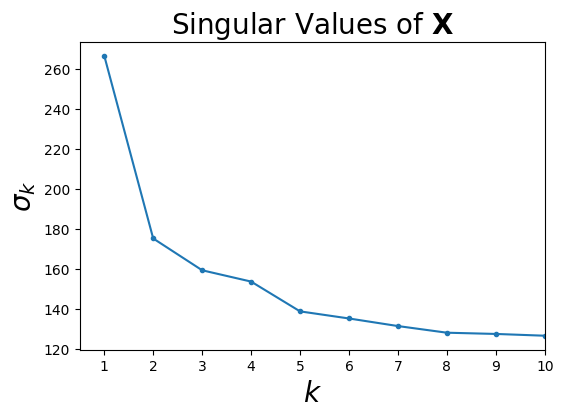

Numero de dimansão escolhido: 5



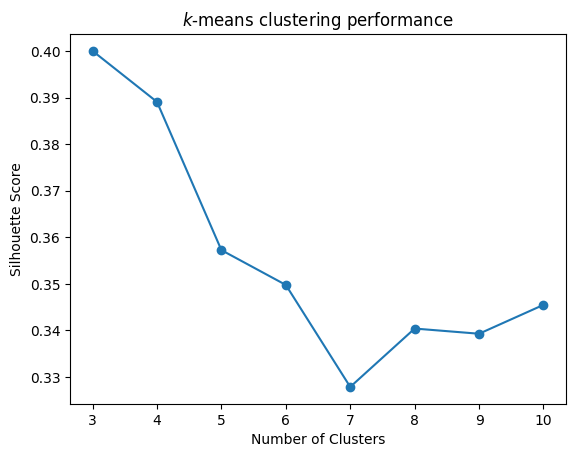

Número k selecionado: 4



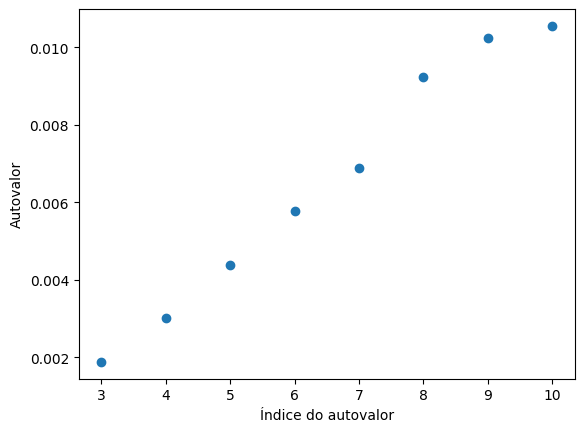

Número de grupos para o Agrupamento Espectral: 7


KMeans
Fowlkes Mallows Score: 0.506

Agrupamento Espectral
Fowlkes Mallows Score: 0.3922

Quantidade de gêneros musicais: 6

---------------------------------------------------------------------
Processando 7 de 28
Idioma: french



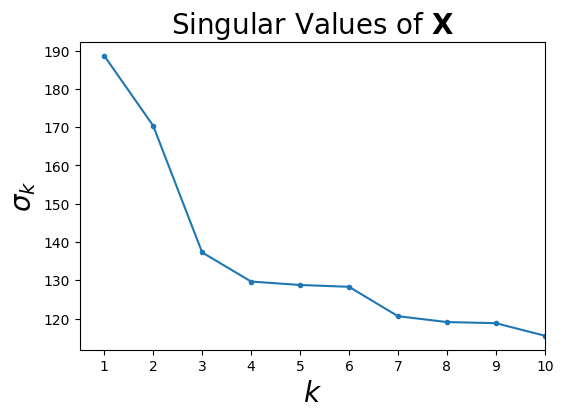

Numero de dimansão escolhido: 7



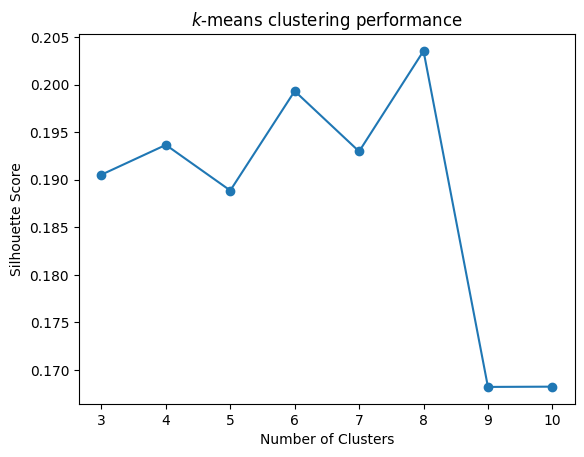

Número k selecionado: 8



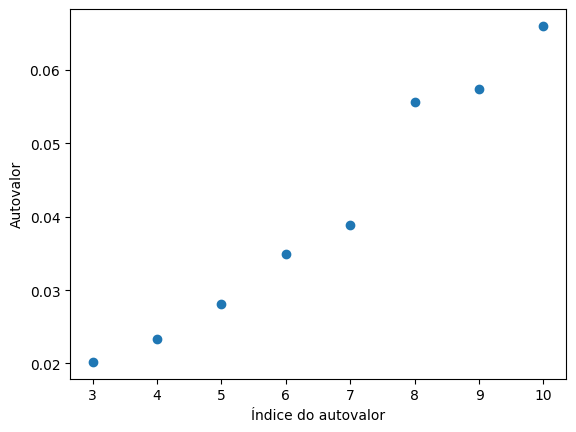

Número de grupos para o Agrupamento Espectral: 7


KMeans
Fowlkes Mallows Score: 0.3696

Agrupamento Espectral
Fowlkes Mallows Score: 0.4045

Quantidade de gêneros musicais: 6

---------------------------------------------------------------------
Processando 8 de 28
Idioma: hungarian



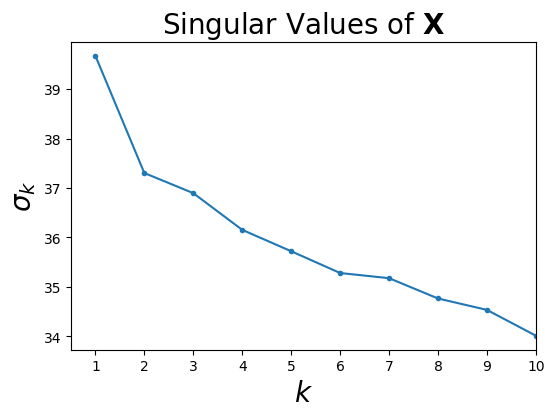

Numero de dimansão escolhido: 6



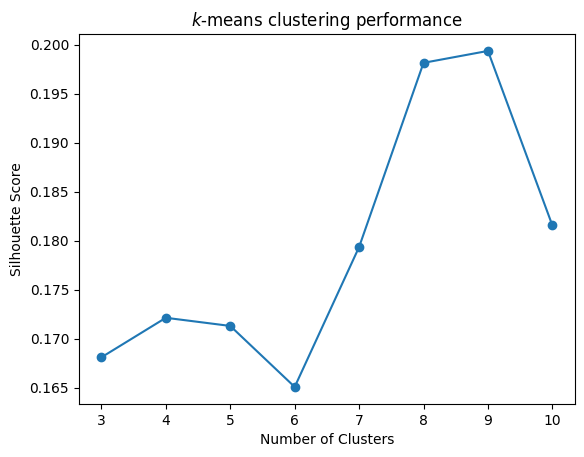

Número k selecionado: 8



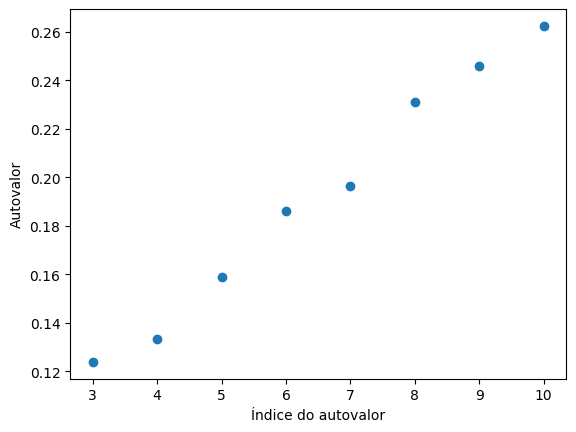

Número de grupos para o Agrupamento Espectral: 7


KMeans
Fowlkes Mallows Score: 0.4052

Agrupamento Espectral
Fowlkes Mallows Score: 0.3033

Quantidade de gêneros musicais: 5

---------------------------------------------------------------------
Processando 9 de 28
Idioma: indonesian



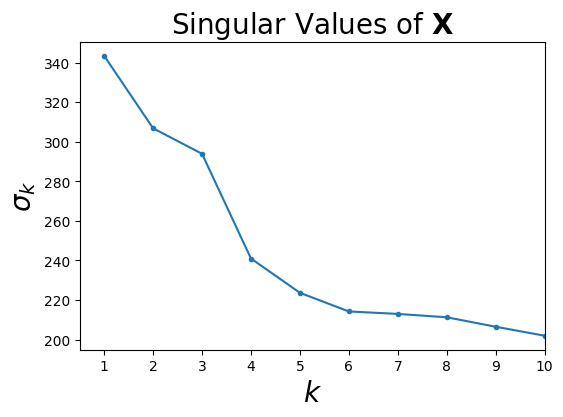

Numero de dimansão escolhido: 6



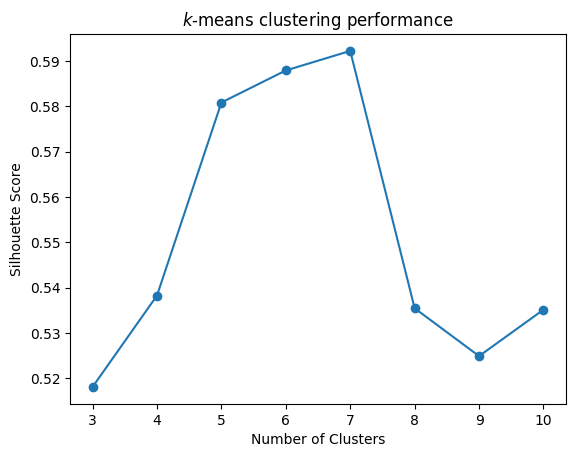

Número k selecionado: 7



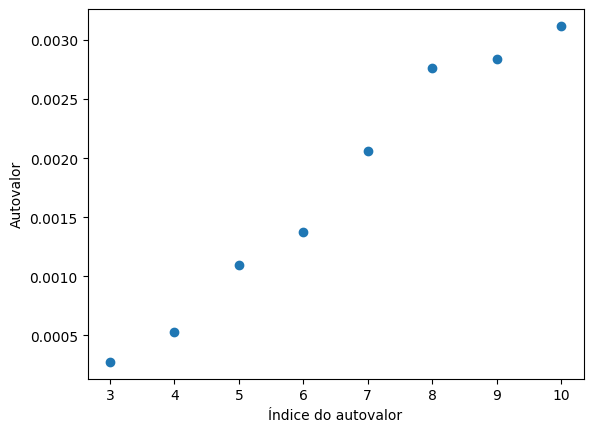

Número de grupos para o Agrupamento Espectral: 6


KMeans
Fowlkes Mallows Score: 0.3699

Agrupamento Espectral
Fowlkes Mallows Score: 0.3346

Quantidade de gêneros musicais: 6

---------------------------------------------------------------------
Processando 10 de 28
Idioma: italian



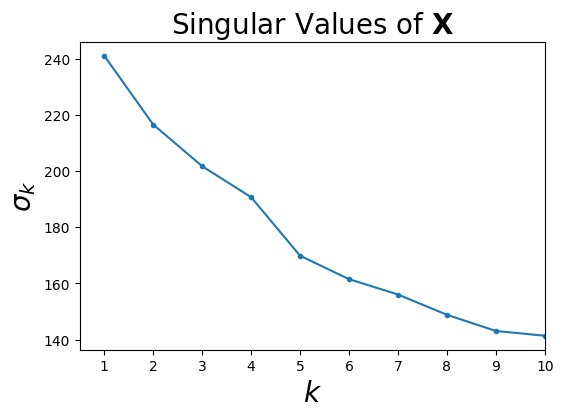

Numero de dimansão escolhido: 6



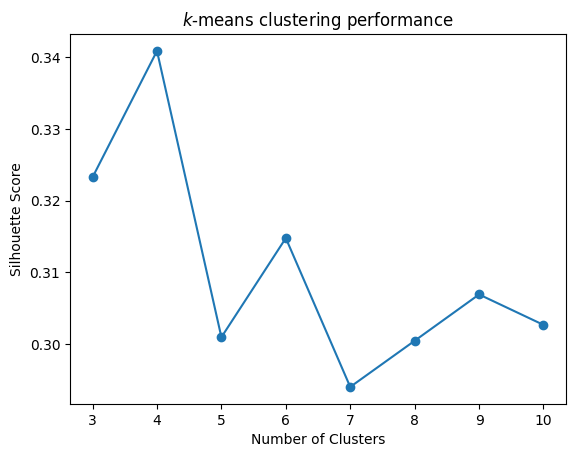

Número k selecionado: 4



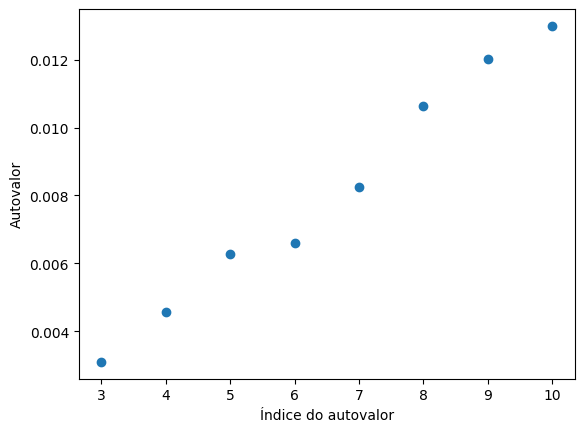

Número de grupos para o Agrupamento Espectral: 7


KMeans
Fowlkes Mallows Score: 0.431

Agrupamento Espectral
Fowlkes Mallows Score: 0.4049

Quantidade de gêneros musicais: 6

---------------------------------------------------------------------
Processando 11 de 28
Idioma: dutch



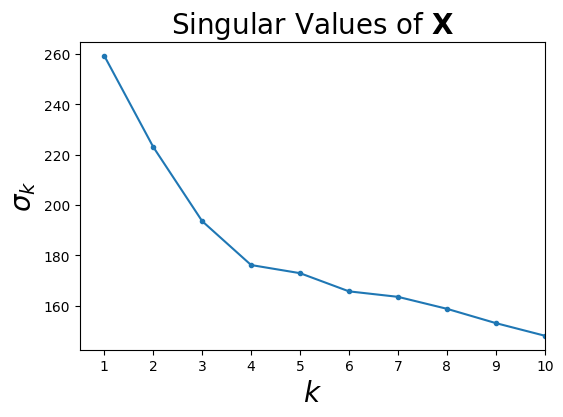

Numero de dimansão escolhido: 6



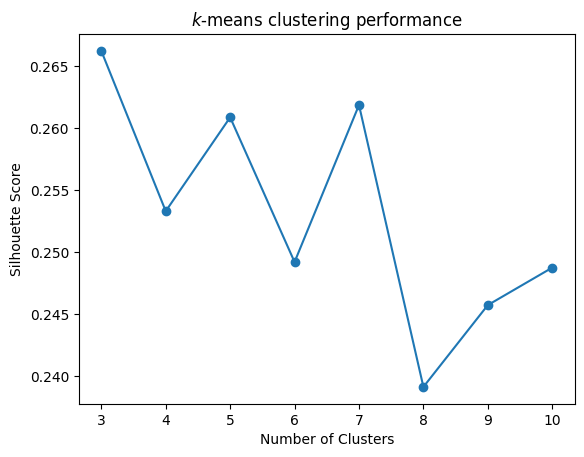

Número k selecionado: 7



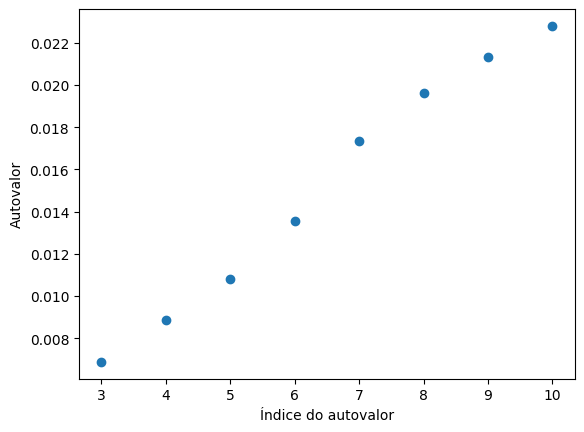

Número de grupos para o Agrupamento Espectral: 6


KMeans
Fowlkes Mallows Score: 0.3803

Agrupamento Espectral
Fowlkes Mallows Score: 0.4071

Quantidade de gêneros musicais: 6

---------------------------------------------------------------------
Processando 12 de 28
Idioma: norwegian



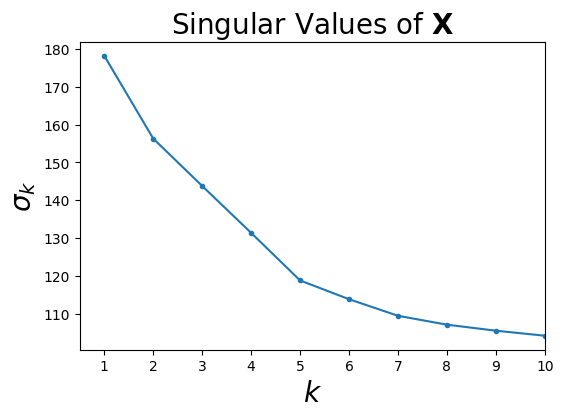

Numero de dimansão escolhido: 7



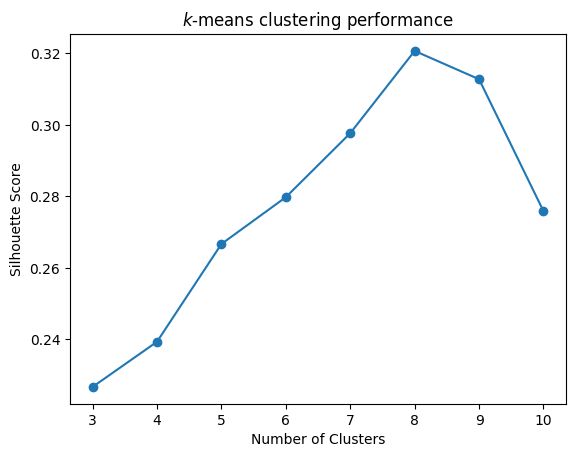

Número k selecionado: 8



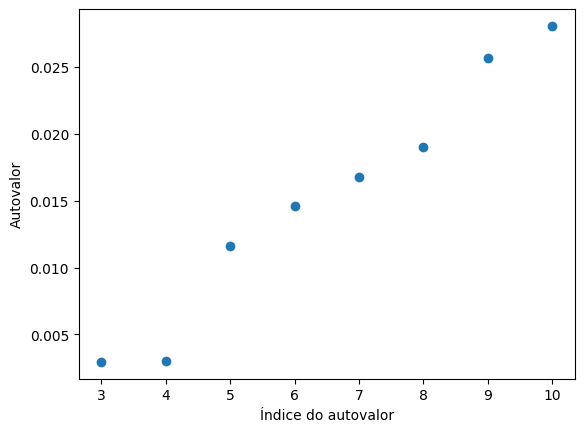

Número de grupos para o Agrupamento Espectral: 4


KMeans
Fowlkes Mallows Score: 0.33

Agrupamento Espectral
Fowlkes Mallows Score: 0.4878

Quantidade de gêneros musicais: 6

---------------------------------------------------------------------
Processando 13 de 28
Idioma: portuguese



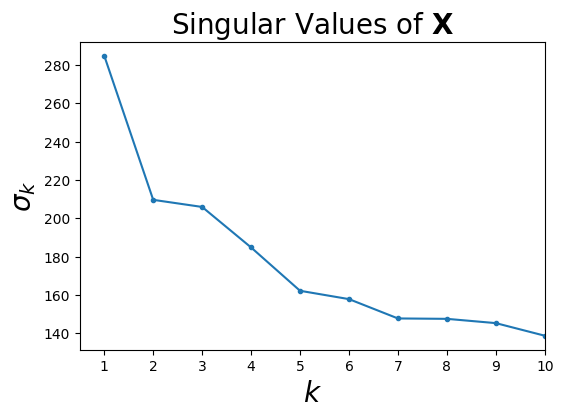

Numero de dimansão escolhido: 7



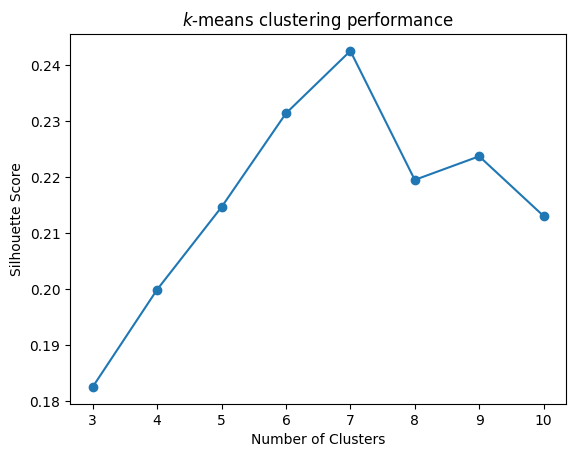

Número k selecionado: 7



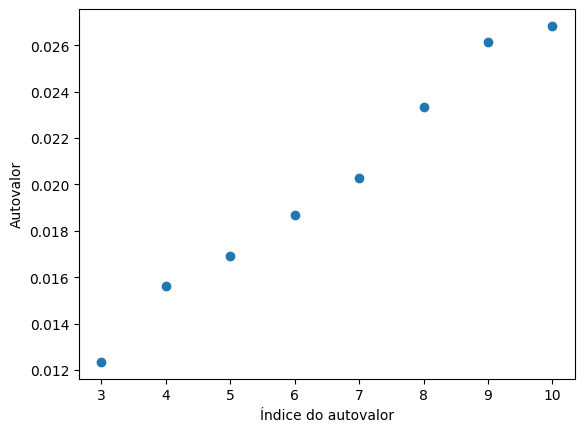

Número de grupos para o Agrupamento Espectral: 3


KMeans
Fowlkes Mallows Score: 0.3302

Agrupamento Espectral
Fowlkes Mallows Score: 0.5752

Quantidade de gêneros musicais: 6

---------------------------------------------------------------------
Processando 14 de 28
Idioma: romanian



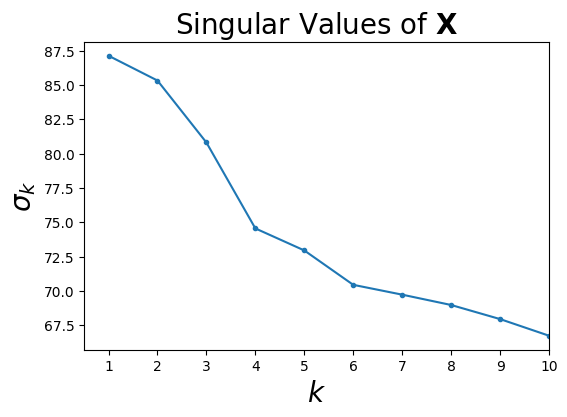

Numero de dimansão escolhido: 6



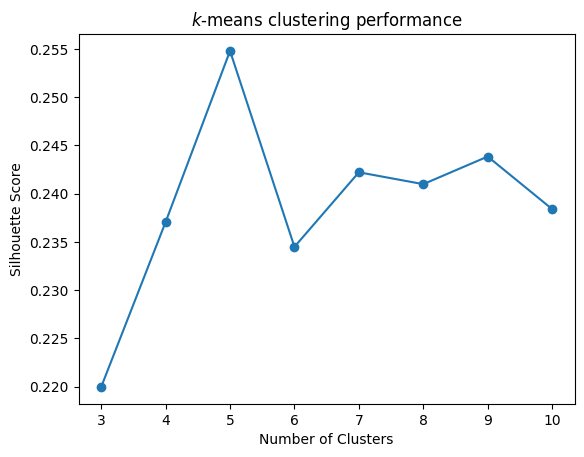

Número k selecionado: 5



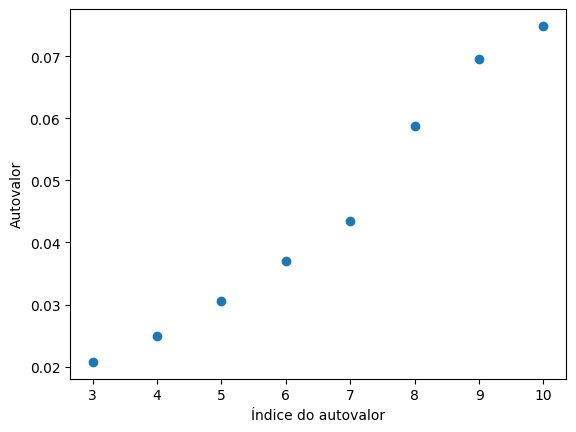

Número de grupos para o Agrupamento Espectral: 7


KMeans
Fowlkes Mallows Score: 0.3916

Agrupamento Espectral
Fowlkes Mallows Score: 0.4598

Quantidade de gêneros musicais: 6

---------------------------------------------------------------------
Processando 15 de 28
Idioma: slovene



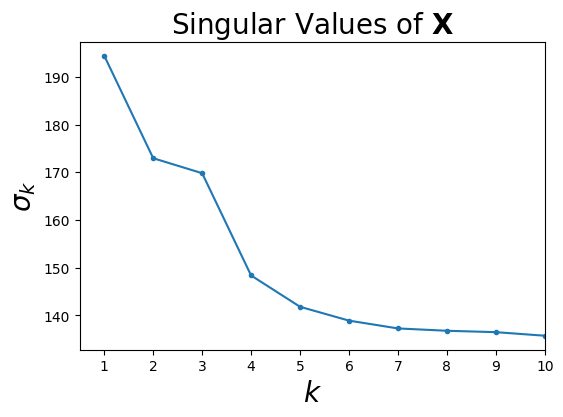

Numero de dimansão escolhido: 5



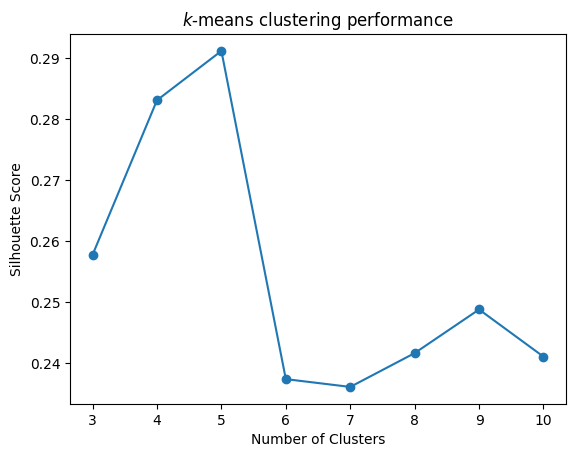

Número k selecionado: 5



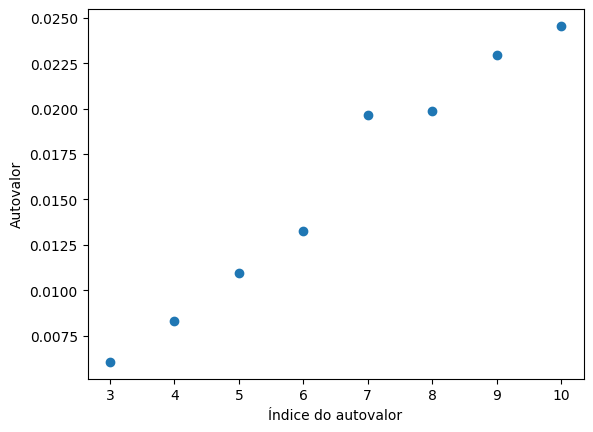

Número de grupos para o Agrupamento Espectral: 6


KMeans
Fowlkes Mallows Score: 0.3767

Agrupamento Espectral
Fowlkes Mallows Score: 0.3655

Quantidade de gêneros musicais: 6

---------------------------------------------------------------------
Processando 16 de 28
Idioma: swedish



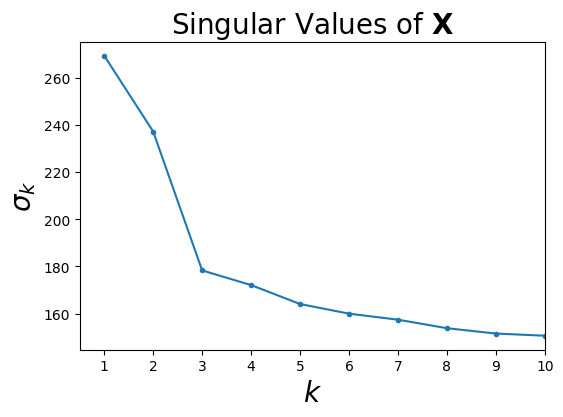

Numero de dimansão escolhido: 5



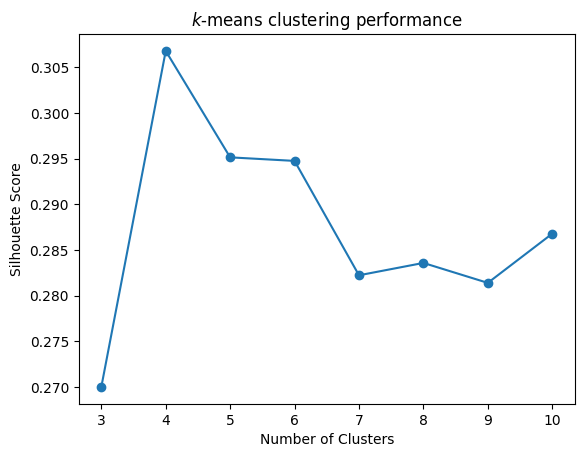

Número k selecionado: 4



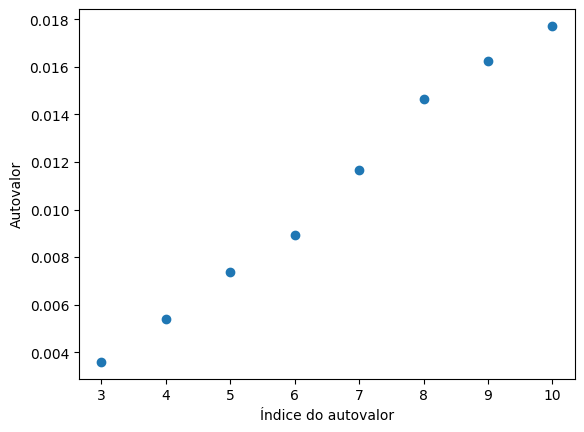

Número de grupos para o Agrupamento Espectral: 6


KMeans
Fowlkes Mallows Score: 0.5498

Agrupamento Espectral
Fowlkes Mallows Score: 0.4849

Quantidade de gêneros musicais: 6

---------------------------------------------------------------------
Processando 17 de 28
Idioma: turkish



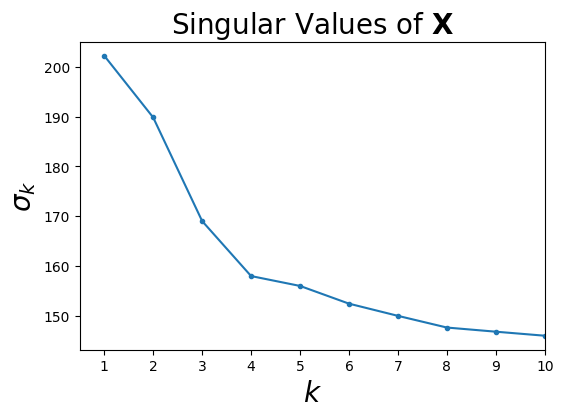

Numero de dimansão escolhido: 8



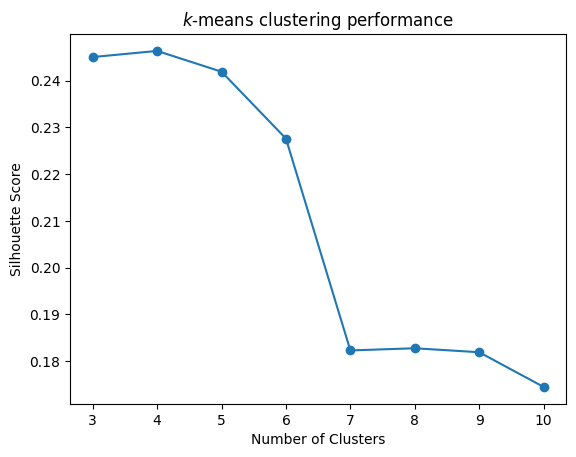

Número k selecionado: 4



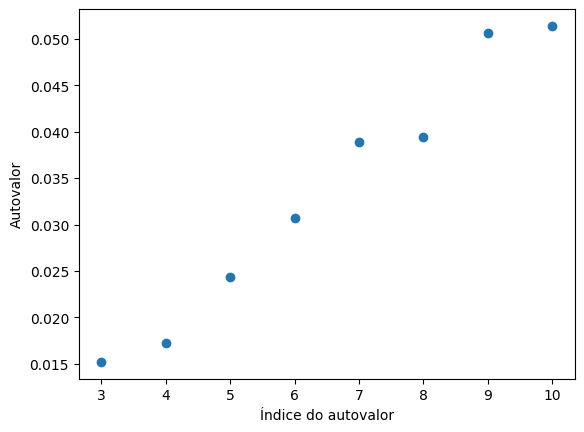

Número de grupos para o Agrupamento Espectral: 8


KMeans
Fowlkes Mallows Score: 0.4612

Agrupamento Espectral
Fowlkes Mallows Score: 0.3797

Quantidade de gêneros musicais: 6



In [2]:
def sc_evaluate_clusters(X, max_clusters, n_init, seed):
  s = np.zeros(max_clusters+1)
  s[0] = 0;
  s[1] = 0;
  s[2] = 0;
  for k in range(3, max_clusters+1):
    kmeans = KMeans(init='k-means++', n_clusters = k, n_init = n_init, random_state = seed)
    kmeans.fit_predict(X)
    s[k] = metrics.silhouette_score(X, kmeans.labels_, metric = 'euclidean')
  return s

del languages_size

dtype_dict = {
  "tag": "category",
  "language": "category"
}

i = 0

for value in languages.values():
  # Liberando memoria
  gc.collect()

  if not os.path.exists(f"{value}.csv"):
    continue

  print("---------------------------------------------------------------------")
  i += 1
  print(f"Processando {i} de {len(languages.values())}")
  print(f"Idioma: {value}")
  print("")


  #### Leitura da base
  df = pd.read_csv(f"{value}.csv", dtype=dtype_dict)
  df = df.dropna(subset=["lyrics"])
  df_tag = pd.get_dummies(df["tag"], prefix="tag")


  ### Construção da matriz de TF-IDF
  vectorizer = TfidfVectorizer(max_df=0.5, min_df=5)
  X = vectorizer.fit_transform(df["lyrics"])
  df_tf_idf = pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out())
  df_tf_idf = df_tf_idf.loc[:, (df_tf_idf < 0.95).any()]
  df_tf_idf = df_tf_idf.loc[:, ((df_tf_idf >= 0.2).sum(axis=0) >= 2)]

  # Liberando memoria
  del df
  gc.collect()


  ### Redução de dimensionalidade
  scaler = StandardScaler(with_mean=True, with_std=True)
  df_tf_idf[df_tf_idf.columns] = scaler.fit_transform(df_tf_idf)
  u, s, vt = np.linalg.svd(df_tf_idf, full_matrices = False)

  # Liberando memoria
  del df_tf_idf
  gc.collect()

  fig = plt.figure(figsize = (6, 4));
  plt.plot(range(1, 11), s[0:10], '.-');
  plt.xlim([0.5, 10]);
  plt.xlabel(r'$k$', size=20);
  plt.xticks(range(1, 11));
  plt.ylabel(r'$\sigma_k$', size=20);
  plt.title(r'Singular Values of $\mathbf{X}$',size=20);
  plt.show();

  dimension_number = int(input("Escolhe um número de dimensão: "))
  print(f"Numero de dimansão escolhido: {dimension_number}\n")

  s[dimension_number:] = 0
  approx = u @ np.diag(s) @ vt
  X_reduced = scaler.fit_transform(approx)

  # Liberando memoria
  del s
  del approx
  del u
  del vt
  gc.collect()


  ### Aplicação de ao menos dois algoritmos de agrupamento

  ## Escolhendo o número de grupos para o  k-means
  s = sc_evaluate_clusters(X_reduced, 10, 10, 1)
  plt.plot(range(3, len(s)), s[3:], 'o-');
  plt.xlabel('Number of Clusters');
  plt.title('$k$-means clustering performance');
  plt.ylabel('Silhouette Score');
  plt.show();


  k_number = int(input("Escolhe um número k: "))
  print(f"Número k selecionado: {k_number}\n")

  # Liberando memoria
  del s
  gc.collect()


  ## Escolhendo o número de grupos para o Agrupamento Espectral
  # 1 Construindo a matriz de adjacências do grafo de vizinhos mais próximos.
  G = kneighbors_graph(X_reduced, n_neighbors = 10, include_self = True)
  A = 0.5 * (G + G.T)

  # 2 Construindo a Laplaciana Normalizada
  L = csgraph.laplacian(A, normed = True).todense()

  # 3 Obtendo os autovalores da Laplaciana Normalizada
  # Valores já estão ordenados em ordem crescente.
  values, _ = LA.eigh(L)

  # 4 Plotando os valores dos 'gaps' e escolhendo um k adequado.
  plt.scatter([i for i in range(3, 11)], values[2:10]);
  plt.xlabel('Índice do autovalor');
  plt.ylabel('Autovalor');
  plt.show();

  groups_number = int(input("Escolhe um número de grupos para o Agrupamento Espectral: "))
  print(f"Número de grupos para o Agrupamento Espectral: {groups_number}\n")

  # Liberando memoria
  del values
  del G
  del A
  del L
  gc.collect()


  ### Validação da metodologia utilizada
  df_tag[df_tag.columns] = scaler.fit_transform(df_tag)
  X_reduced_tag = df_tag
  n_clusters_tag = df_tag.shape[1]

  # Liberando memoria
  del df_tag
  gc.collect()

  print("\nKMeans")
  kmeans_tag = KMeans(init='k-means++', n_clusters=n_clusters_tag, n_init=10)
  kmeans_tag.fit_predict(X_reduced_tag)

  kmeans = KMeans(init='k-means++', n_clusters=k_number, n_init=10)
  kmeans.fit_predict(X_reduced)

  print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(kmeans.labels_,kmeans_tag.labels_), 4)}\n")

  # Liberando memoria
  del kmeans_tag
  del kmeans
  gc.collect()

  print("Agrupamento Espectral")
  m = SpectralClustering(n_clusters=groups_number, affinity='nearest_neighbors', n_neighbors=10)
  m.fit(X_reduced)

  m_tag = SpectralClustering(n_clusters=n_clusters_tag, affinity='nearest_neighbors', n_neighbors=10)
  m_tag.fit(X_reduced_tag)

  print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(m.labels_, m_tag.labels_), 4)}\n")

  print(f"Quantidade de gêneros musicais: {n_clusters_tag}\n")

  # Liberando memoria
  del m
  del m_tag
  del X_reduced
  del X_reduced_tag
  del n_clusters_tag
  gc.collect()

### 6. Interpretação dos resultados

|             | **Número de Grupos** |    **Número de Grupos**   | **Número de Grupos** | **Fowlkes Mallows Score** | **Fowlkes Mallows Score** |
|:-----------:|:--------------------:|:-------------------------:|:--------------------:|:-------------------------:|:-------------------------:|
|  **Idioma** |      **K-Means**     | **Agrupamento Espectral** |    **Verdadeiro**    |        **K-Means**        | **Agrupamento Espectral** |
|   Catalan   |           7          |             5             |           6          |           0,3243          |           0,3589          |
|    Danish   |           6          |             5             |           5          |           0,3762          |           0,3982          |
|    German   |           6          |             6             |           6          |           0,3705          |           0,3764          |
|   English   |           4          |             6             |           6          |           0,4108          |           0,4095          |
|   Spanish   |           6          |             6             |           6          |           0,3932          |           0,3941          |
|   Finnish   |           4          |             7             |           6          |           0,5060          |           0,3922          |
|    French   |           8          |             7             |           6          |           0,3696          |           0,4045          |
|  Hungarian  |           8          |             7             |           5          |           0,4052          |           0,3033          |
|  Indonesian |           7          |             6             |           6          |           0,3699          |           0,3346          |
|   Italian   |           4          |             7             |           6          |           0,4310          |           0,4049          |
|    Dutch    |           7          |             6             |           6          |           0,3803          |           0,4071          |
|  Norwegian  |           8          |             4             |           6          |           0,3300          |           0,4878          |
|  Portuguese |           7          |             3             |           6          |           0,3302          |           0,5752          |
|   Romanian  |           5          |             7             |           6          |           0,3916          |           0,4598          |
|   Slovene   |           5          |             6             |           6          |           0,3767          |           0,3655          |
| **Swedish** |         **4**        |           **6**           |         **6**        |         **0,5498**        |         **0,4849**        |
|   Turkish   |           4          |             8             |           6          |           0,4612          |           0,3797          |

A tabela acima apresenta um resumo dos valores para todos os idiomas do número de grupos selecionados e qual é o valor do Índice Fowlkes-Mallows.

É possível observar que o idioma que obteve o maior valor geral de Índice Fowlkes-Mallows foi o Swedish, com 0,5498 para o K-means e 0,4849 para o agrupamento espectral.

Também é possível observar que, de forma geral, a comparação entre os valores reais de agrupamento dos gêneros musicais e os valores agrupados pelas letras de música utilizando o Índice Fowlkes-Mallows não obteve um resultado muito bom. Isso ocorre porque a maioria dos valores para os dois agrupamentos está entre 0,3 e 0,5, sendo poucos maiores que 0,5. Além disso, para a maioria dos idiomas, há pouca variação de valores entre os dois agrupamentos.

Com isso, pode-se considerar que existe uma relação entre os grupos criados pelas letras das músicas e os grupos dos gêneros musicais. No entanto, essa relação não é muito forte, mas também não é nula.

É possível verificar que, de fato, a partir das letras das músicas é possível fazer um agrupamento delas. Isso foi evidenciado ao analisar todos os gráficos utilizados para selecionar a quantidade de grupos. Esses gráficos não foram gerados de forma aleatória e realmente ficava evidente neles o número de grupos para cada língua.

Além disso, observando a tabela acima, fica visível que o número de grupos encontrados pela maioria dos idiomas está bem próximo da quantidade de grupos que existem nos gêneros musicais.